# Analyze Flight Data: Visualization Project    
   
#### Sarah Griggs   


## Table of Contents
- [Introduction](#intro)
- [Part I - Initial Data Investigation & Cleaning](#investigation)
- [Part II - Exploratory Analysis](#exploratory)



<a id='intro'></a>
### Introduction

I have chosen to look at flight data from 5 years to determine if there are patterns that change over time. I did not take data from every single year due to the size of files being very large. The other option would have been to look at  a sample from each year, but I prefer to look at the population. 

<a id='investigation'></a>
### Part I - Initial Data Investigation & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
import statsmodels.api as sm

%matplotlib inline


In [2]:
#Read in all files as data frames
df1 = pd.read_csv("2007.csv", encoding = "ISO-8859-1")

df1.CarrierDelay=df1.CarrierDelay.astype(float)
df1.WeatherDelay=df1.WeatherDelay.astype(float)
df1.NASDelay=df1.NASDelay.astype(float)
df1.SecurityDelay=df1.SecurityDelay.astype(float)
df1.LateAircraftDelay=df1.LateAircraftDelay.astype(float)

df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [3]:
df2 = pd.read_csv("2006.csv", encoding = "ISO-8859-1")

df2.CarrierDelay=df2.CarrierDelay.astype(float)
df2.WeatherDelay=df2.WeatherDelay.astype(float)
df2.NASDelay=df2.NASDelay.astype(float)
df2.SecurityDelay=df2.SecurityDelay.astype(float)
df2.LateAircraftDelay=df2.LateAircraftDelay.astype(float)

df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [4]:
df3 = pd.read_csv("2005.csv", encoding = "ISO-8859-1")
df3.CarrierDelay=df3.CarrierDelay.astype(float)
df3.WeatherDelay=df3.WeatherDelay.astype(float)
df3.NASDelay=df3.NASDelay.astype(float)
df3.SecurityDelay=df3.SecurityDelay.astype(float)
df3.LateAircraftDelay=df3.LateAircraftDelay.astype(float)

df3.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [5]:
df4 = pd.read_csv("2004.csv", encoding = "ISO-8859-1")
df4.CarrierDelay=df4.CarrierDelay.astype(float)
df4.WeatherDelay=df4.WeatherDelay.astype(float)
df4.NASDelay=df4.NASDelay.astype(float)
df4.SecurityDelay=df4.SecurityDelay.astype(float)
df4.LateAircraftDelay=df4.LateAircraftDelay.astype(float)

df4.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4606199,2004,8,19,4,2111.0,2115,2213.0,2224,AA,809,...,3,9,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5603482,2004,10,17,7,1802.0,1810,1940.0,1949,XE,2116,...,11,8,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5556981,2004,10,18,1,1510.0,1519,1556.0,1605,OO,3677,...,6,6,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5656545,2004,10,27,3,1236.0,1240,1441.0,1451,DL,1249,...,9,20,0,NaN,0,0.0,0.0,0.0,0.0,0.0
6751761,2004,12,17,5,1905.0,1830,1940.0,1907,OO,6474,...,4,11,0,NaN,0,33.0,0.0,0.0,0.0,0.0
3808552,2004,7,22,4,618.0,620,1201.0,1210,UA,374,...,14,9,0,NaN,0,0.0,0.0,0.0,0.0,0.0
794434,2004,2,15,7,1337.0,1345,1641.0,1633,OO,3716,...,14,26,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2977566,2004,6,18,5,703.0,700,759.0,808,US,1275,...,6,8,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3426942,2004,6,14,1,2002.0,2012,2146.0,2156,AS,459,...,6,8,0,NaN,0,0.0,0.0,0.0,0.0,0.0
428859,2004,1,13,2,947.0,950,1532.0,1541,NW,264,...,11,18,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [6]:
df5 = pd.read_csv("2008.csv", encoding = "ISO-8859-1")

df5.CarrierDelay=df5.CarrierDelay.astype(float)
df5.WeatherDelay=df5.WeatherDelay.astype(float)
df5.NASDelay=df5.NASDelay.astype(float)
df5.SecurityDelay=df5.SecurityDelay.astype(float)
df5.LateAircraftDelay=df5.LateAircraftDelay.astype(float)

df5.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1156149,2008,2,11,1,NaN,700,NaN,940,CO,716,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
5114783,2008,9,16,2,651.0,700,1404.0,1421,DL,1288,...,13.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3915382,2008,7,2,3,604.0,610,656.0,710,WN,3308,...,2.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3342881,2008,6,15,7,620.0,620,738.0,736,F9,297,...,11.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4426488,2008,8,14,4,1057.0,1101,1152.0,1158,OO,5410,...,2.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6046644,2008,11,9,7,641.0,645,937.0,957,XE,2745,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1594628,2008,3,7,5,NaN,1850,NaN,1925,MQ,4425,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
6933448,2008,12,12,5,2022.0,1955,2132.0,2110,AA,1826,...,4.0,11.0,0,NaN,0,22.0,0.0,0.0,0.0,0.0
263784,2008,1,6,7,1753.0,1725,2043.0,2020,US,791,...,7.0,13.0,0,NaN,0,0.0,23.0,0.0,0.0,0.0
3494614,2008,6,13,5,1433.0,1430,1529.0,1535,AA,1112,...,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Look at data frames to make sure they all have the same rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(12), int64(12), object(5)
memory usage: 1.6+ GB


In [8]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [9]:
wholeDF = df1.append([df2,df3,df4,df5])

In [10]:
wholeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 8.0+ GB


In [11]:
wholeDF.sample(50)
#Here we start to see data structure issues. Year, Month, and Day of month should be transformed into a single date field. 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2760787,2007,5,21,1,1917.0,1920,2042.0,2050,DL,1037,...,6.0,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4285763,2004,8,10,2,1408.0,1411,1556.0,1547,NW,1261,...,6.0,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2363269,2006,5,9,2,2030.0,2030,2205.0,2150,WN,2042,...,5.0,8.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0
6931709,2004,12,30,4,652.0,545,742.0,635,MQ,3766,...,7.0,5.0,0,NaN,0,67.0,0.0,0.0,0.0,0.0
1740526,2007,3,22,4,1357.0,1250,1618.0,1510,AA,2348,...,7.0,26.0,0,NaN,0,0.0,0.0,68.0,0.0,0.0
6456319,2007,11,14,3,943.0,945,1518.0,1556,UA,136,...,2.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4186048,2005,7,10,7,608.0,615,908.0,910,DL,414,...,9.0,24.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4394015,2004,8,4,3,940.0,945,1034.0,1043,XE,2172,...,5.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3096198,2006,6,19,1,1102.0,1105,1156.0,1202,OO,3735,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
5212463,2008,9,20,6,1606.0,1610,1753.0,1805,MQ,4277,...,4.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [12]:
#Create a copy so that I'm not working in the original dataframe
df = wholeDF.copy()

In [13]:
df.Year=df.Year.astype(str)
df.Month=df.Month.astype(str)
df.DayofMonth=df.DayofMonth.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 object
Month                object
DayofMonth           object
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(7), object(8)
memory usage: 8.0+ GB


In [14]:
df['Date'] = df.Year.map(str) + "-" + df.Month + "-" + df.DayofMonth
df.sample(50)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
3665653,2004,7,10,6,1719.0,1649,1831.0,1755,NW,1043,...,21.0,0,NaN,0,30.0,0.0,6.0,0.0,0.0,2004-7-10
4381503,2005,8,24,3,921.0,930,1058.0,1106,NW,1723,...,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2005-8-24
6077765,2008,11,5,3,700.0,700,1035.0,1034,OH,6744,...,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-5
1145499,2007,2,22,4,1922.0,1915,2234.0,2230,CO,1662,...,27.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-2-22
727167,2005,2,27,7,1015.0,1015,1128.0,1135,WN,2047,...,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2005-2-27
939105,2004,2,8,7,1423.0,1424,1434.0,1448,HP,664,...,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-2-8
1609891,2004,3,17,3,1705.0,1708,1849.0,1903,AA,1023,...,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-3-17
7442865,2007,12,7,5,1112.0,1118,1316.0,1323,DL,464,...,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-12-7
760934,2008,2,23,6,615.0,600,948.0,903,OH,5145,...,32.0,0,NaN,0,15.0,0.0,30.0,0.0,0.0,2008-2-23
4184482,2004,8,26,4,727.0,730,1153.0,1159,US,1600,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2004-8-26


In [15]:
#Change Date to datetime for plotting purposes
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 object
Month                object
DayofMonth           object
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), floa

In [16]:
#Create a single Delay column that indicates if any delay was present. 
df['Delay'] = np.where(df['CarrierDelay'] > 0, 1,0)
df['Delay'] = np.where(df['WeatherDelay'] > 0, 1,0)
df['Delay'] = np.where(df['NASDelay'] > 0, 1,0)
df['Delay'] = np.where(df['SecurityDelay'] > 0, 1,0)
df['Delay'] = np.where(df['LateAircraftDelay'] > 0, 1,0)


In [17]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,0,NaN,0,3.0,0.0,0.0,0.0,31.0,2007-01-01,1
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,0,NaN,0,23.0,0.0,0.0,0.0,3.0,2007-01-01,1
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 31 columns):
Year                 object
Month                object
DayofMonth           object
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
Delay                int32
dtyp


<a id='Exploratory'></a>
### Part II - Exploratory Analysis

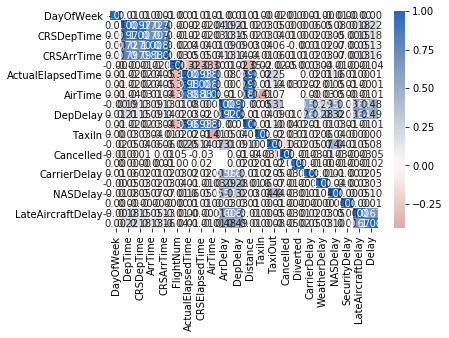

In [19]:
sb.heatmap(df.corr(), annot = True, fmt = '.02f', cmap = 'vlag_r', center = 0)

In [20]:
#A closer look at correlations from above
df.corr()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
DayOfWeek,1.000000,0.005339,0.005333,0.004892,0.005677,-0.000017,0.008654,0.014124,0.010467,-0.003272,...,0.001127,-0.015380,-0.005798,0.000046,0.008796,-0.001043,-0.013461,0.003169,-0.000092,0.002052
DepTime,0.005339,1.000000,0.968440,0.721177,0.789191,-0.000846,-0.019830,-0.019768,-0.039919,0.187152,...,0.033623,0.048504,0.000812,0.002163,0.061249,0.048610,0.082513,0.001701,0.178305,0.216031
CRSDepTime,0.005333,0.968440,1.000000,0.703508,0.786410,-0.006059,-0.017539,-0.016868,-0.034146,0.130689,...,0.029072,0.038085,0.014096,0.000041,0.021903,0.032207,0.046894,-0.001312,0.147844,0.180146
ArrTime,0.004892,0.721177,0.703508,1.000000,0.875982,-0.017507,0.038668,0.035264,0.009588,0.085771,...,0.038571,0.058090,NaN,-0.000422,0.011797,0.015805,0.074813,-0.000645,0.052051,0.129786
CRSArrTime,0.005677,0.789191,0.786410,0.875982,1.000000,-0.029401,0.051790,0.052355,0.040432,0.126832,...,-0.007856,0.058157,0.011270,0.006098,0.020133,0.030625,0.065063,-0.000488,0.133132,0.163976
FlightNum,-0.000017,-0.000846,-0.006059,-0.017507,-0.029401,1.000000,-0.321730,-0.325923,-0.296403,0.013778,...,0.024571,-0.017614,0.049922,-0.001891,0.034705,0.039657,-0.005755,-0.001870,-0.013526,-0.043097
ActualElapsedTime,0.008654,-0.019830,-0.017539,0.038668,0.051790,-0.321730,1.000000,0.979652,0.875996,0.084288,...,0.016526,0.254354,NaN,NaN,0.021756,0.007318,0.159018,0.006422,0.004600,0.009741
CRSElapsedTime,0.014124,-0.019768,-0.016868,0.035264,0.052355,-0.325923,0.979652,1.000000,0.878790,0.001200,...,0.009062,0.141941,-0.032421,0.018753,0.016000,-0.006320,0.046436,0.005352,-0.003005,-0.007431
AirTime,0.010467,-0.039919,-0.034146,0.009588,0.040432,-0.296403,0.875996,0.878790,1.000000,0.007799,...,-0.406811,0.067402,NaN,NaN,0.004032,-0.032874,0.054171,0.004549,-0.006882,-0.005164
ArrDelay,-0.003272,0.187152,0.130689,0.085771,0.126832,0.013778,0.084288,0.001200,0.007799,1.000000,...,0.051073,0.306573,NaN,NaN,0.560710,0.285354,0.506504,0.032820,0.603289,0.480441


In [21]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,0,NaN,0,3.0,0.0,0.0,0.0,31.0,2007-01-01,1
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,0,NaN,0,23.0,0.0,0.0,0.0,3.0,2007-01-01,1
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01,0


In [22]:
#Explore the Question: Do certain Carriers have more Delays
#It will be interesting to dig into this visually, perhaps over time so that we can see if certain carriers improved or worsened.
carrierDelays = df.groupby(['Year','UniqueCarrier', 'Delay']).size().reset_index(name='counts')
carrierDelaysTrue = carrierDelays[carrierDelays['Delay'] != 0]
carrierDelaysTrue = carrierDelaysTrue.rename(index=str, columns={"Delay": "Delay True"})
carrierDelaysFalse = carrierDelays[carrierDelays['Delay'] != 1]
carrierDelaysFalse = carrierDelaysFalse.rename(index=str, columns={"Delay": "Delay False"})
carrierDelaysTrue.head()
carrierDelaysFalse.head()

,Year,UniqueCarrier,Delay False,counts
0,2004,AA,0,633751
2,2004,AS,0,149262
4,2004,B6,0,81552
6,2004,CO,0,283943
8,2004,DH,0,229052


In [23]:
carrierDelayFull = pd.merge(carrierDelaysTrue, carrierDelaysFalse, left_on = ['UniqueCarrier', 'Year'], right_on = ['UniqueCarrier','Year'])
carrierDelayFull.head()

,Year,UniqueCarrier,Delay True,counts_x,Delay False,counts_y
0,2004,AA,1,64797,0,633751
1,2004,AS,1,17730,0,149262
2,2004,B6,1,8282,0,81552
3,2004,CO,1,15386,0,283943
4,2004,DH,1,35903,0,229052


In [24]:
carrierDelayFull['Percentage'] = carrierDelayFull['counts_x']/(carrierDelayFull['counts_x']+carrierDelayFull['counts_y'])
carrierDelayFull.head()

,Year,UniqueCarrier,Delay True,counts_x,Delay False,counts_y,Percentage
0,2004,AA,1,64797,0,633751,0.092760
1,2004,AS,1,17730,0,149262,0.106173
2,2004,B6,1,8282,0,81552,0.092192
3,2004,CO,1,15386,0,283943,0.051402
4,2004,DH,1,35903,0,229052,0.135506


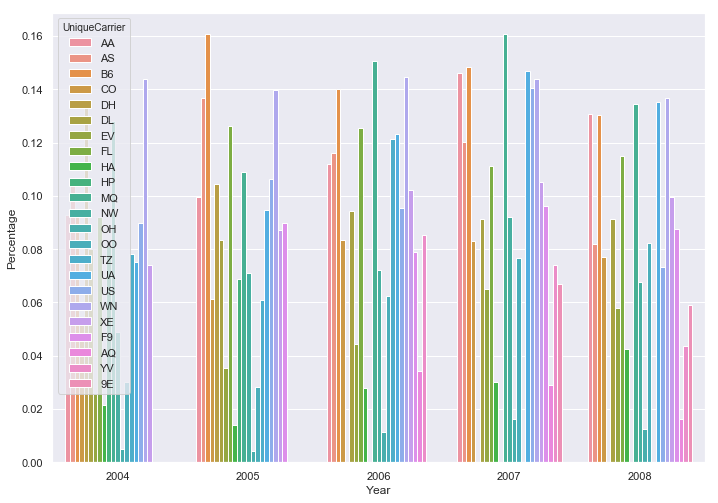

In [25]:

sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.barplot(x="Year", y="Percentage", hue='UniqueCarrier', data = carrierDelayFull, saturation=0.8)

#Here we can see that Delays in general spiked in 2005 and seem to decline and then started to reduce. We can also tell which airlines have the largest percentage of flights delayed from this chart.
#Another interesting note is that the total number of airlines celcined from 2004-2008

In [27]:
dfNegDelays = df[df['DepDelay']<0]
dfNegDelays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16883212 entries, 13 to 7009725
Data columns (total 31 columns):
Year                 object
Month                object
DayofMonth           object
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
Delay                int32
dty

In [53]:
groupdf3 = df.groupby(['DayOfWeek','Delay']).size().reset_index(name='delays')
groupdf3 = groupdf3[groupdf3['Delay'] == 1]
groupdf3

,DayOfWeek,Delay,delays
1,1,1,533012
3,2,1,437288
5,3,1,481102
7,4,1,581380
9,5,1,632132
11,6,1,334252
13,7,1,495045


In [54]:
groupdf5 = df.groupby(['DayOfWeek']).size().reset_index(name='totalflights')
groupdf5

,DayOfWeek,totalflights
0,1,5290205
1,2,5212085
2,3,5251204
3,4,5290905
4,5,5305893
5,6,4513654
6,7,5010785


In [56]:
merge6 = pd.merge(groupdf5, groupdf3, left_on = 'DayOfWeek', right_on = 'DayOfWeek')
merge6

,DayOfWeek,totalflights,Delay,delays
0,1,5290205,1,533012
1,2,5212085,1,437288
2,3,5251204,1,481102
3,4,5290905,1,581380
4,5,5305893,1,632132
5,6,4513654,1,334252
6,7,5010785,1,495045


In [59]:
merge6['percentage'] = merge6['delays']/merge6['totalflights']
merge6

,DayOfWeek,totalflights,Delay,delays,percentage
0,1,5290205,1,533012,0.100755
1,2,5212085,1,437288,0.083899
2,3,5251204,1,481102,0.091617
3,4,5290905,1,581380,0.109883
4,5,5305893,1,632132,0.119138
5,6,4513654,1,334252,0.074054
6,7,5010785,1,495045,0.098796


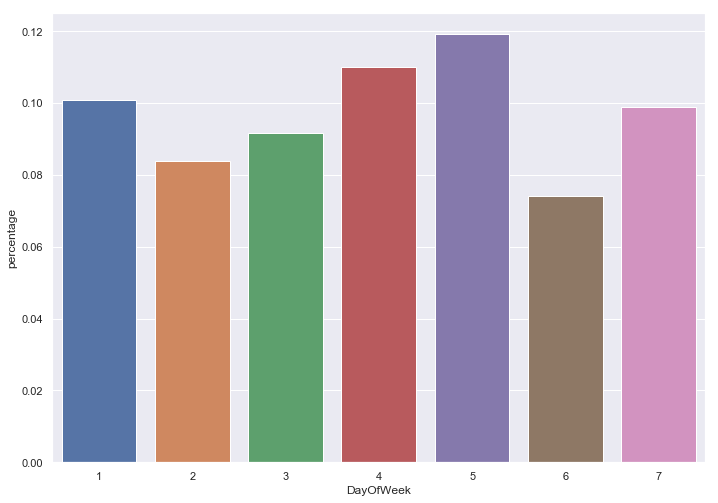

In [61]:
#This graph explores the relationship between overall delays and day of week 
sb.barplot(x="DayOfWeek", y="percentage", data = merge6, saturation=0.8)

In [30]:
df['CarrierDelayBool'] = np.where(df['CarrierDelay'] > 0, 1,0)
df['WeatherDelayBool'] = np.where(df['WeatherDelay'] > 0, 1,0)
df['NASDelayBool'] = np.where(df['NASDelay'] > 0, 1,0)
df['SecurityDelayBool'] = np.where(df['SecurityDelay'] > 0, 1,0)
df['LateAircraftDelayBool'] = np.where(df['LateAircraftDelay'] > 0, 1,0)



In [31]:
df.sample(50)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delay,CarrierDelayBool,WeatherDelayBool,NASDelayBool,SecurityDelayBool,LateAircraftDelayBool
2595211,2007,5,28,1,1650.0,1645,1910.0,1842,YV,7269,...,0.0,0.0,0.0,2007-05-28,0,1,0,0,0,0
400001,2004,1,31,6,1655.0,1655,1814.0,1822,MQ,3635,...,0.0,0.0,0.0,2004-01-31,0,0,0,0,0,0
1864345,2004,4,23,5,1438.0,1425,1538.0,1530,WN,1660,...,0.0,0.0,0.0,2004-04-23,0,0,0,0,0,0
4563824,2006,8,14,1,1316.0,1317,1622.0,1614,NW,730,...,0.0,0.0,0.0,2006-08-14,0,0,0,0,0,0
1977846,2008,4,27,7,1247.0,1242,1338.0,1328,OO,5542,...,NaN,NaN,NaN,2008-04-27,0,0,0,0,0,0
4643980,2006,8,6,7,1227.0,1222,1323.0,1331,AA,2055,...,0.0,0.0,0.0,2006-08-06,0,0,0,0,0,0
619068,2006,2,4,6,725.0,725,818.0,825,WN,1726,...,0.0,0.0,0.0,2006-02-04,0,0,0,0,0,0
6233873,2007,10,17,3,1305.0,1310,1531.0,1544,DL,672,...,0.0,0.0,0.0,2007-10-17,0,0,0,0,0,0
2745077,2008,5,8,4,2131.0,2120,2255.0,2245,FL,847,...,NaN,NaN,NaN,2008-05-08,0,0,0,0,0,0
4793352,2006,9,15,5,1355.0,1335,1527.0,1515,WN,2748,...,0.0,0.0,0.0,2006-09-15,0,0,0,0,0,0


In [32]:
groupdf2 = df.groupby(['Year','CarrierDelayBool']).size().reset_index(name='CarrierDelays')
groupdf2 = groupdf2[groupdf2['CarrierDelayBool']==1]
groupdf3 = df.groupby(['Year','WeatherDelayBool']).size().reset_index(name='WeatherDelays')
groupdf3 = groupdf3[groupdf3['WeatherDelayBool']==1]
groupdf4 = df.groupby(['Year','SecurityDelayBool']).size().reset_index(name='SecurityDelays')
groupdf4 = groupdf4[groupdf4['SecurityDelayBool']==1]
groupdf5 = df.groupby(['Year','NASDelayBool']).size().reset_index(name='NASDelays')
groupdf5 = groupdf5[groupdf5['NASDelayBool']==1]
groupdf6 = df.groupby(['Year','LateAircraftDelayBool']).size().reset_index(name='LateAircraftDelays')
groupdf6 = groupdf6[groupdf6['LateAircraftDelayBool']==1]


merge1 = pd.merge(groupdf2, groupdf3, left_on = 'Year', right_on = 'Year')
merge1

,Year,CarrierDelayBool,CarrierDelays,WeatherDelayBool,WeatherDelays
0,2004,1,571166,1,115989
1,2005,1,658635,1,111388
2,2006,1,718349,1,113743
3,2007,1,814922,1,127849
4,2008,1,670622,1,99985


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35874731 entries, 0 to 7009727
Data columns (total 36 columns):
Year                     object
Month                    object
DayofMonth               object
DayOfWeek                int64
DepTime                  float64
CRSDepTime               int64
ArrTime                  float64
CRSArrTime               int64
UniqueCarrier            object
FlightNum                int64
TailNum                  object
ActualElapsedTime        float64
CRSElapsedTime           float64
AirTime                  float64
ArrDelay                 float64
DepDelay                 float64
Origin                   object
Dest                     object
Distance                 int64
TaxiIn                   float64
TaxiOut                  float64
Cancelled                int64
CancellationCode         object
Diverted                 int64
CarrierDelay             float64
WeatherDelay             float64
NASDelay                 float64
SecurityDelay    

In [34]:
merge2 = pd.merge(merge1, groupdf4, left_on = 'Year', right_on = 'Year')
merge3 = pd.merge(merge2, groupdf5, left_on = 'Year', right_on = 'Year')
merge4 = pd.merge(merge3, groupdf6, left_on = 'Year', right_on = 'Year')

merge4 = merge4.drop(['CarrierDelayBool', 'WeatherDelayBool','SecurityDelayBool','NASDelayBool','LateAircraftDelayBool'], axis=1)

merge4

,Year,CarrierDelays,WeatherDelays,SecurityDelays,NASDelays,LateAircraftDelays
0,2004,571166,115989,8158,898557,593926
1,2005,658635,111388,6627,897203,630944
2,2006,718349,113743,10673,941866,731324
3,2007,814922,127849,9269,1044257,838599
4,2008,670622,99985,6202,928031,699418


True


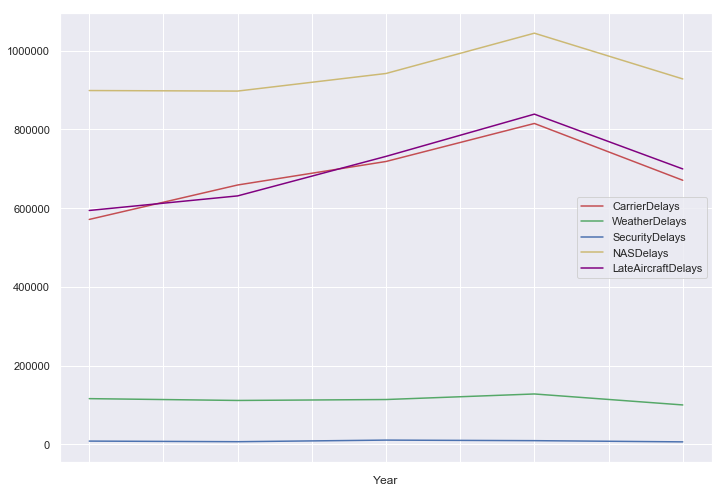

In [35]:
#Here we see that NAS delays are the most prevalent along with Late Aircraft and Carrier. Security is the least prevalent. 
ax1 = merge4.plot(x='Year', y='CarrierDelays', color='r')    
ax2 = merge4.plot(x='Year', y='WeatherDelays', color='g', ax=ax1)    
ax3 = merge4.plot( x='Year', y='SecurityDelays', color='b', ax=ax1)
ax4 = merge4.plot( x='Year', y='NASDelays', color='y', ax=ax1)
ax5 = merge4.plot( x='Year', y='LateAircraftDelays', color='purple', ax=ax1)
print(ax1 == ax2 == ax3 == ax4 == ax5)  # True


In [79]:
#Here I want to confirm that 2007 was the peak of delays in total
plotdf9 = df.groupby(['Year','Delay']).size().reset_index(name='counts')
plotdf9 = plotdf9[plotdf9['Delay'] == 1]
plotdf10 = df.groupby(['Year']).size().reset_index(name='totalflights')
merge13 = pd.merge(plotdf9, plotdf10, left_on = 'Year', right_on = 'Year')

merge13['percentage'] = merge13['counts']/merge13['totalflights']
merge13
#by Percent we see that 2008 was the peak

,Year,Delay,counts,totalflights,percentage
0,2004,1,593926,7129270,0.083308
1,2005,1,630944,7140596,0.088360
2,2006,1,731324,7141922,0.102399
3,2007,1,838599,7453215,0.112515
4,2008,1,699418,7009728,0.099778


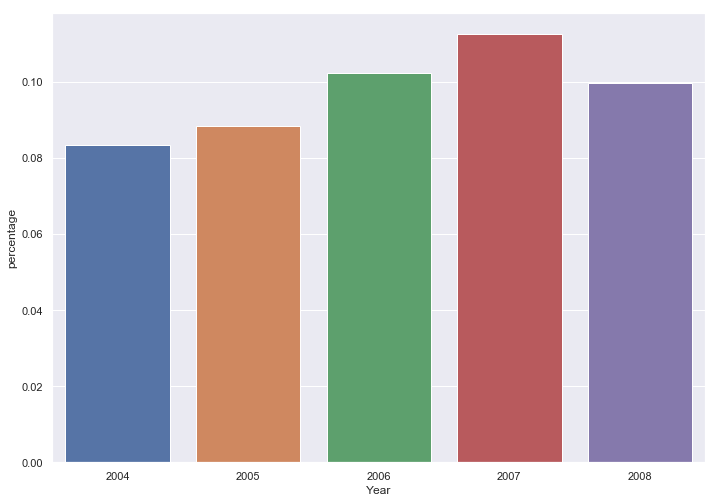

In [80]:
#This plot explores overall delays and year

sb.barplot(x="Year", y="percentage", data = merge13, saturation=0.8)

In [47]:
plotdf5 = df.groupby(['Month','Delay']).size().reset_index(name='counts')
plotdf5 = plotdf5[plotdf5['Delay'] == 1]
plotdf5

,Month,Delay,counts
1,1,1,291959
3,10,1,240438
5,11,1,228808
7,12,1,394092
9,2,1,290920
11,3,1,308641
13,4,1,246904
15,5,1,258586
17,6,1,367306
19,7,1,362626


In [75]:
plotdf11 = df.groupby(['Month','Delay']).size().reset_index(name='delays')
plotdf11 = plotdf11[plotdf11['Delay'] == 1]
plotdf12 = df.groupby(['Month']).size().reset_index(name='totalflights')
merge14 = pd.merge(plotdf11, plotdf12, left_on = 'Month', right_on = 'Month')

merge14['percentage'] = merge14['delays']/merge14['totalflights']
merge14

,Month,Delay,delays,totalflights,percentage
0,1,1,291959,2987522,0.097726
1,10,1,240438,3000664,0.080128
2,11,1,228808,2865366,0.079853
3,12,1,394092,2942929,0.133911
4,2,1,290920,2765295,0.105204
5,3,1,308641,3079468,0.100225
6,4,1,246904,2975587,0.082977
7,5,1,258586,3050080,0.084780
8,6,1,367306,3034247,0.121053
9,7,1,362626,3139862,0.115491


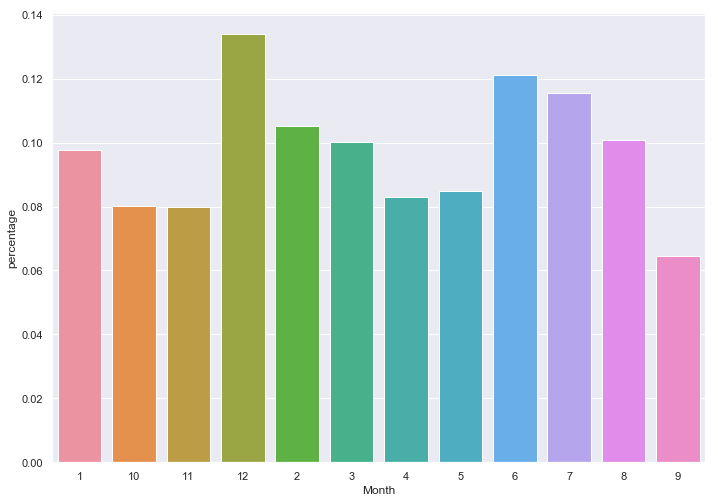

In [78]:
#This chart explores the relationship between seasonality and delays. We see that more extreem weather tends to crete more delays. 
sb.barplot(x="Month", y="percentage", data = merge14, saturation=0.8)

In [62]:
groupdf7 = df.groupby(['Month','CarrierDelayBool']).size().reset_index(name='CarrierDelays')
groupdf7 = groupdf7[groupdf7['CarrierDelayBool']==1]
groupdf8 = df.groupby(['Month','WeatherDelayBool']).size().reset_index(name='WeatherDelays')
groupdf8 = groupdf8[groupdf8['WeatherDelayBool']==1]
groupdf9 = df.groupby(['Month','SecurityDelayBool']).size().reset_index(name='SecurityDelays')
groupdf9 = groupdf9[groupdf9['SecurityDelayBool']==1]
groupdf10 = df.groupby(['Month','NASDelayBool']).size().reset_index(name='NASDelays')
groupdf10 = groupdf10[groupdf10['NASDelayBool']==1]
groupdf11 = df.groupby(['Month','LateAircraftDelayBool']).size().reset_index(name='LateAircraftDelays')
groupdf11 = groupdf11[groupdf11['LateAircraftDelayBool']==1]


merge7 = pd.merge(groupdf7, groupdf8, left_on = 'Month', right_on = 'Month')
merge8 = pd.merge(merge7, groupdf9, left_on = 'Month', right_on = 'Month')
merge9 = pd.merge(merge8, groupdf10, left_on = 'Month', right_on = 'Month')
merge10 = pd.merge(merge9, groupdf11, left_on = 'Month', right_on = 'Month')

merge10 = merge10.drop(['CarrierDelayBool', 'WeatherDelayBool','SecurityDelayBool','NASDelayBool','LateAircraftDelayBool'], axis=1)

merge10

,Month,CarrierDelays,WeatherDelays,SecurityDelays,NASDelays,LateAircraftDelays
0,1,290343,57623,3241,413459,291959
1,10,236223,33740,2469,350266,240438
2,11,230241,32608,2245,335795,228808
3,12,389829,67267,5346,491793,394092
4,2,278966,51568,3268,401919,290920
5,3,305343,43332,3676,406829,308641
6,4,248087,30995,2763,344843,246904
7,5,248824,39406,2427,363829,258586
8,6,345718,68493,3601,473956,367306
9,7,350574,64781,3714,446549,362626


True


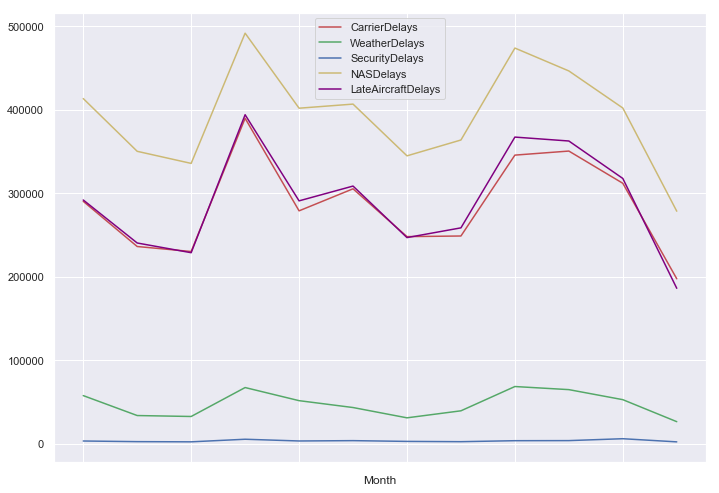

In [65]:
#Here we see that there is Seasonality in type of delay as well 
ax6 = merge10.plot(x='Month', y='CarrierDelays', color='r')    
ax7 = merge10.plot(x='Month', y='WeatherDelays', color='g', ax=ax6)    
ax8 = merge10.plot( x='Month', y='SecurityDelays', color='b', ax=ax6)
ax9 = merge10.plot( x='Month', y='NASDelays', color='y', ax=ax6)
ax10 = merge10.plot( x='Month', y='LateAircraftDelays', color='purple', ax=ax6)
print(ax6 == ax7 == ax8 == ax9 == ax10)  # True
